In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [3]:
import pandas as pd
import csv
import os
import numpy as np
import nltk
import re

In [5]:
path=os.getcwd()
path

'/Users/garima/AISecKG-cybersecurity-dataset/Model/kg'

In [7]:
triple = pd.read_csv(path + '/triples_validated.csv')

In [8]:
triple.head()

,Unnamed: 0,e1,r,e2
0,1,Attacks,can_harm,public domain
1,2,IDS,uses,Intrusion Detection
2,3,Snort,uses,Intrusion Detection
3,4,Snort,can_detect,network attacks
4,5,packet logger,is_part_of,Snort


In [18]:
len(triple)

801

In [20]:
t1= triple.drop_duplicates(subset=['e1','r','e2'],keep='first')

In [21]:
len(t1)

729

In [22]:
t1.to_csv('clean_triples.csv')

In [23]:
# get a subset of triples to create a sub graphh on Nmap
triple_kg = t1[48:68]

In [148]:
triple_kg.head()

,e1,r,e2
0,Nmap,uses,network discovery
1,Nmap,uses,security auditing
2,Nmap,has_a,network mapper
3,Nmap,uses,network scanning
4,network scanning,has_a,tools


In [147]:
len(triple_kg)

19

In [75]:
triple_kg.to_csv('temp.csv')

In [146]:
triple_kg = pd.read_csv(path + '/temp.csv')

In [149]:
# get the nodes and edges for KG
source = triple_kg['e1'].str.lower().tolist()
target = triple_kg['e2'].str.lower().tolist()
relations = triple_kg['r'].tolist()


 Knowledge Graph generated


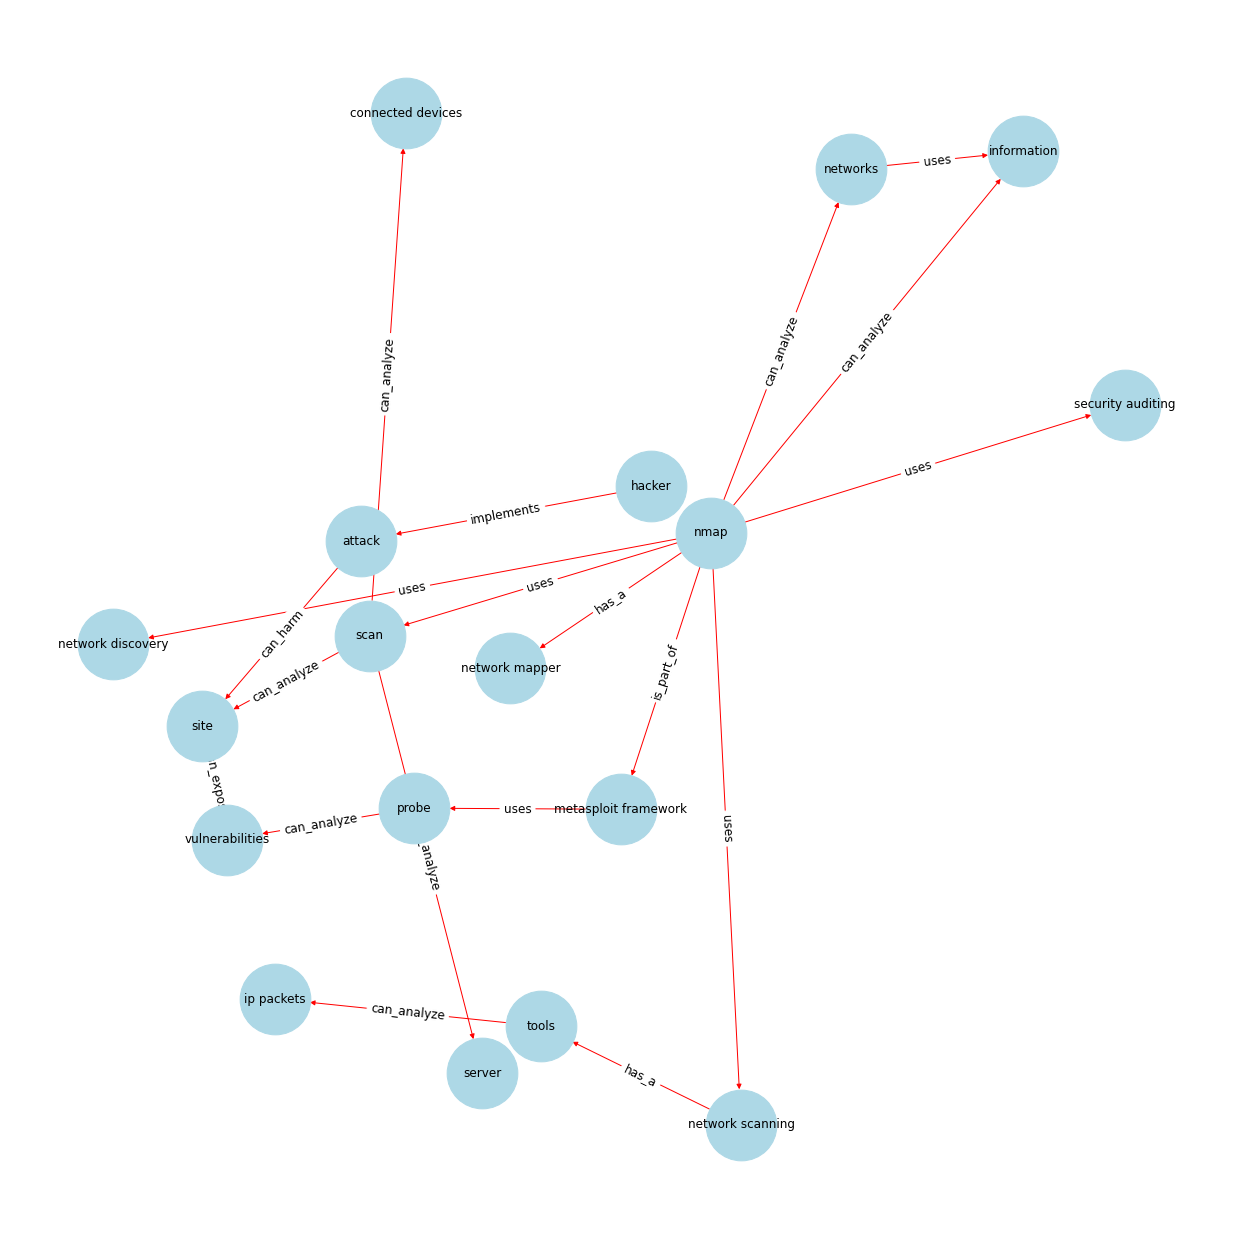

In [179]:
# generate the knowledge graph using networkx library
G = nx.DiGraph(directed=True)  
for i in range(len(relations)):
    G.add_weighted_edges_from([(source[i], target[i], i)])
     #print(G.nodes)
#print(len(G.edges))
print("\n Knowledge Graph generated")
size = 17
# if (len(relations)/2)>20:
#     size= len(edge)/2
plt.figure(figsize=(size, size))
edge_labels= dict([((u,v), relations[d['weight']]) for u,v, d in G.edges(data=True)])
pos=nx.spring_layout(G,k=1.2)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.savefig('kg4.png')